## Test prior extend value

In [160]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from PIL import Image
import os


In [161]:
EXTEND = 100 
SLOPE = 10

Text(0, 0.5, 'Sigmoid(X) with extend 100 and slope 10')

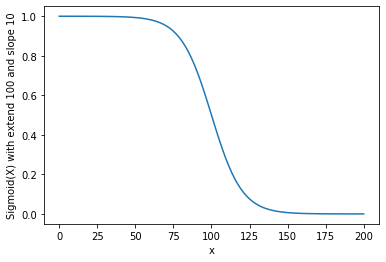

In [162]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
x = np.linspace(0, EXTEND * 2, 100)
y = sigmoid((-x + EXTEND)/ SLOPE)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel(f"Sigmoid(X) with extend {EXTEND} and slope {SLOPE}")

In [163]:
def vectorized_distance(A, p):
    H,W = A.shape
    px, py = p
    X,Y = np.ix_(np.arange(H),np.arange(W))
    return np.sqrt((X-px)**2 + (Y-py)**2)

In [164]:
ind = ([0,20,200], [2, 250, 250], [0, 15, 100], [3, 0, 250], [5, 10, 50],  [4, 10, 20])

In [165]:
mask = np.ones((6, 350, 350)) * np.infty

In [166]:
for i in ind:
    p = i[1:]
    s = i[0]
    mask[s, :, :] = np.minimum(mask[s, :, :], vectorized_distance(mask[s, :, :], p)) 

print(mask[0,:5,:5])

mask = ((-1) * mask + EXTEND) / SLOPE

mask = sigmoid(mask)

[[101.11874208 100.12991561  99.14131329  98.15294188  97.16480844]
 [100.97524449  99.98499887  98.99494937  98.00510191  97.01546269]
 [100.84145973  99.84988733  98.85848471  97.86725704  96.87620967]
 [100.7174265   99.72462083  98.73196038  97.73944956  96.74709298]
 [100.60318086  99.60923652  98.61541462  97.62171889  96.62815325]]


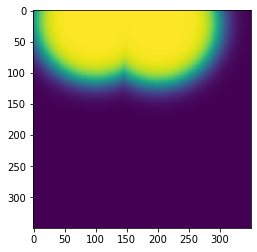

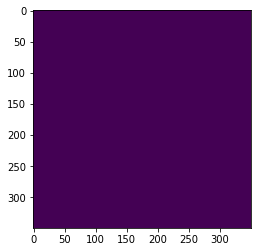

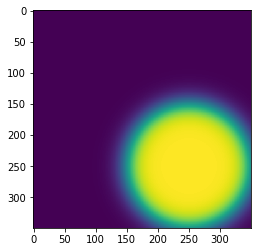

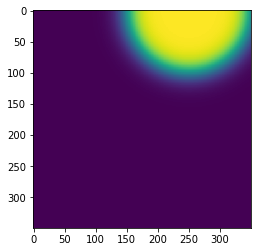

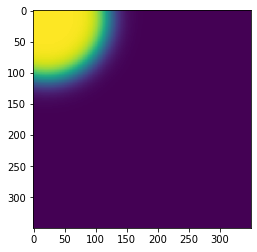

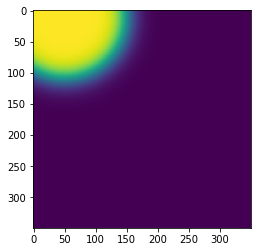

In [167]:
for i in range(mask.shape[0]):
    plt.figure()
    plt.imshow(mask[i, :, :], interpolation='nearest')

In [168]:
p = ind[0][1:]
p

[20, 200]

In [169]:
m = mask[0]
m

array([[4.72060582e-01, 4.96752155e-01, 5.21453987e-01, ...,
        7.88066924e-03, 7.14250377e-03, 6.47295234e-03],
       [4.75638193e-01, 5.00375028e-01, 5.25105137e-01, ...,
        7.98415184e-03, 7.23573673e-03, 6.55694175e-03],
       [4.78975911e-01, 5.03752746e-01, 5.28506934e-01, ...,
        8.08365978e-03, 7.32538186e-03, 6.63769284e-03],
       ...,
       [1.92534145e-11, 1.98141576e-11, 2.03858275e-11, ...,
        5.92289015e-12, 5.68429424e-12, 5.45404854e-12],
       [1.74951840e-11, 1.80032950e-11, 1.85212640e-11, ...,
        5.40645356e-12, 5.18920255e-12, 4.97953162e-12],
       [1.58971377e-11, 1.63575491e-11, 1.68268541e-11, ...,
        4.93481716e-12, 4.73700975e-12, 4.54608308e-12]])

In [170]:
dist = vectorized_distance(m, p)

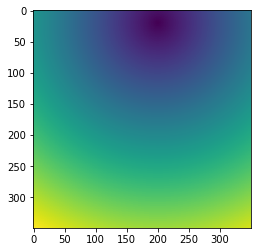

In [171]:
plt.imshow(dist, interpolation='nearest')
plt.show()

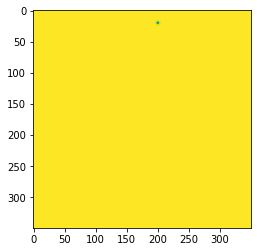

In [172]:
plt.imshow(sigmoid(dist), interpolation='nearest')
plt.show()